# PART A (EXPLORATORY DATA ANALYSIS AND DATA PRE-PROCESSING)

## A) Importing the requisite libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from sklearn import metrics
%matplotlib inline

## B) Loading the data set into a Python data frame.

In [2]:
df = pd.read_csv('cancer.csv')

## C) A bar graph to show the frequency of the cancer stages.

Text(0.5, 1.0, 'Frequency of the Cancer Stages')

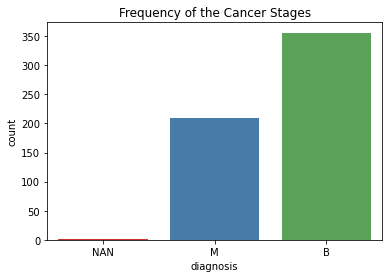

In [3]:
sb.countplot(x=df['diagnosis'], palette="Set1", data=df).set_title("Frequency of the Cancer Stages")

## D) Replacing the (M) with 1 and (B) occurences with 0

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,NaN,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1.0,21.56,22.39,142,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1.0,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1.0,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1.0,20.60,29.33,140.1,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## E) Dropping the 'id' feature


In [6]:
df = df.drop(columns ='id', axis=1)

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,NaN,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.1,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## F) Limiting the number of variables to the first 10 after dropping the 'id' variable

In [8]:
column_start = df.columns.get_loc('diagnosis')
column_end = df.columns.get_loc('diagnosis')+10
resultant_dataframe=column_start,column_end
resultant_dataframe


(0, 10)

## G) Randomly selecting 300 records from the resultant data frame

In [9]:
column_start = df.columns.get_loc('diagnosis')
column_end = df.columns.get_loc('diagnosis')+10
resultant_dataframe=column_start,column_end
resultant_dataframe

(0, 10)

In [10]:
df.iloc[:569,column_start:column_end].sample(n=300)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
461,1.0,27.420,26.27,186.9,2501.0,0.10840,0.19880,0.363500,0.16890,0.2061
372,1.0,21.370,15.10,141.3,1386.0,0.10010,0.15150,0.193200,0.12550,0.1973
109,0.0,11.340,21.26,72.48,396.5,0.08759,0.06575,0.051330,0.01899,0.1487
226,0.0,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788
56,1.0,19.210,18.57,125.5,1152.0,0.10530,0.12670,0.132300,0.08994,0.1917
...,...,...,...,...,...,...,...,...,...,...
197,1.0,18.080,21.84,117.4,1024.0,0.07371,0.08642,0.110300,0.05778,0.1770
560,0.0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537
336,0.0,12.990,14.23,84.08,514.3,0.09462,0.09965,0.037380,0.02098,0.1652
50,0.0,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.01115,0.1495


## H) Displaying a summary of the total number of missing values for each of the 10 features

In [11]:
df.iloc[:569,column_start:column_end].isna().sum()

diagnosis              3
radius_mean            0
texture_mean           2
perimeter_mean         1
area_mean              1
smoothness_mean        3
compactness_mean       1
concavity_mean         3
concave points_mean    1
symmetry_mean          3
dtype: int64

## I) Using imputation to replace missing vaues with the mode of a column

In [12]:
df = df.fillna(df.mode().iloc[0])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.1,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### J) Displaying the mean, standard deviation and the maximum values of the texture and area mean

In [13]:
statistics = df[["texture_mean", "area_mean"]].agg(['std', 'mean', 'max'])
statistics

,texture_mean,area_mean
std,4.301948,351.958761
mean,19.278137,654.551318
max,39.280000,2501.000000


## K) Outputting the correlations of all the numerical variables 

In [14]:
df.corr()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.726170,0.417013,0.704675,0.352744,0.584752,0.678998,0.766437,0.317744,-0.019039,...,0.768344,0.459077,0.774861,0.728284,0.419067,0.583817,0.654273,0.784920,0.409119,0.320610
radius_mean,0.726170,1.000000,0.319043,0.986901,0.168441,0.506263,0.672030,0.822366,0.138325,-0.310931,...,0.969249,0.294058,0.964911,0.941082,0.119692,0.413474,0.525465,0.744214,0.163953,0.007066
texture_mean,0.417013,0.319043,1.000000,0.316907,-0.023060,0.236586,0.303529,0.290474,0.068488,-0.070761,...,0.343419,0.907653,0.351593,0.335647,0.076157,0.277161,0.299774,0.290191,0.106402,0.120691
area_mean,0.704675,0.986901,0.316907,1.000000,0.174298,0.496392,0.680547,0.821811,0.139710,-0.283371,...,0.962076,0.285922,0.958424,0.958922,0.123383,0.388271,0.509932,0.720101,0.140807,0.002911
smoothness_mean,0.352744,0.168441,-0.023060,0.174298,1.000000,0.656805,0.512571,0.551820,0.553091,0.580425,...,0.211095,0.037887,0.234231,0.204846,0.804867,0.470684,0.435249,0.501184,0.396030,0.498851
compactness_mean,0.584752,0.506263,0.236586,0.496392,0.656805,1.000000,0.871052,0.829933,0.587037,0.561581,...,0.535644,0.246477,0.587998,0.509401,0.564686,0.864859,0.813676,0.814302,0.508961,0.686567
concavity_mean,0.678998,0.672030,0.303529,0.680547,0.512571,0.871052,1.000000,0.910040,0.471964,0.329166,...,0.680854,0.300460,0.720436,0.670184,0.443839,0.749763,0.881188,0.850084,0.399018,0.509055
concave points_mean,0.766437,0.822366,0.290474,0.821811,0.551820,0.829933,0.910040,1.000000,0.451247,0.165161,...,0.829886,0.290674,0.854032,0.809498,0.453366,0.667514,0.752235,0.910218,0.375859,0.368817
symmetry_mean,0.317744,0.138325,0.068488,0.139710,0.553091,0.587037,0.471964,0.451247,1.000000,0.469132,...,0.176563,0.090104,0.207396,0.166774,0.423786,0.458394,0.424370,0.417431,0.690538,0.427151
fractal_dimension_mean,-0.019039,-0.310931,-0.070761,-0.283371,0.580425,0.561581,0.329166,0.165161,0.469132,1.000000,...,-0.252091,-0.046193,-0.206789,-0.231354,0.503046,0.457522,0.346824,0.175013,0.332442,0.764887


## L) A heatmap of the correlations of all the numerical variables in the data frame.

<AxesSubplot:title={'center':'Heat Map of the Correlations of all Numerical Variables'}>

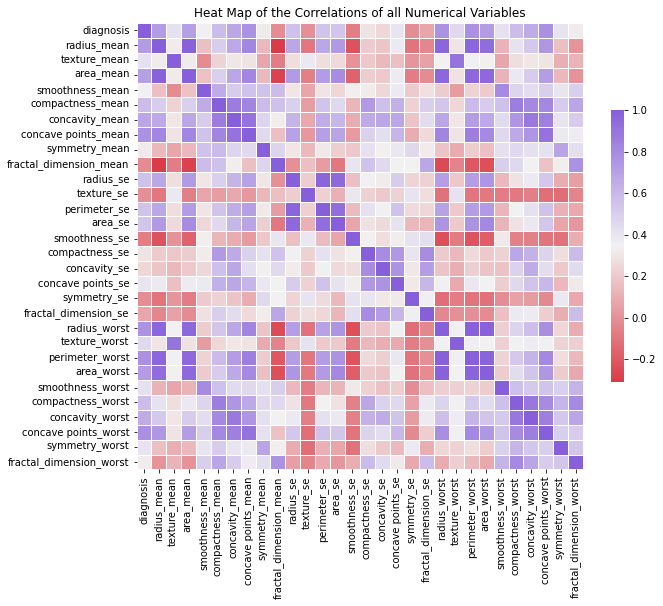

In [15]:
corr = df.corr(method = 'pearson') # Correlation Matrix

fig, ax = plt.subplots(figsize=(10, 10))

#Create a custom diverging colormap
cmap = sb.diverging_palette(10, 275, as_cmap=True)

ax.set_title('Heat Map of the Correlations of all Numerical Variables')
# Draw the heatmap with correct aspect ratio
sb.heatmap(corr,  cmap=cmap,
            square=True, xticklabels=True, 
            yticklabels=True, linewidths=.5, 
            cbar_kws={"shrink": .5})


## M) How does a heatmap help to decide variables to drop, in bid to reduce dimensionality?
- A heatmap shows variables or features that are highly correlated and it is suggested that these are dropped as they result in redundant information or predictive bias for the information that is contained in those variables or features.



## N) A scatter plot between texture_mean and the area_mean variables

[Text(0.5, 1.0, 'Scatter plot between the texture_mean and the area_mean')]

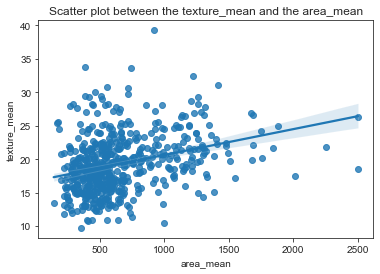

In [16]:
sb.set_style('white')
sb.set_style('ticks')


sb.regplot(x = 'area_mean', y= 'texture_mean', data=df).set(title='Scatter plot between the texture_mean and the area_mean')

## O) Commenting on the relationship between two variables above, comparing the scatter plot and the correlation coefficient obtained above into code.
- It is quite evident from the scatter plot above that there is a positive correlation between texture_mean and area_mean. The coefficent correlation of 0.3 states a weak positive relationship between the two.


# PART B

# a) Importing the requisite libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# b i) Loading the data into a data frame

In [18]:
#loading the data
df = pd.read_csv(r'C:\Users\bida20-011\Downloads\prices.csv.csv')
df.head()


,Area (sqm),Price ($)
0,185.80600,88600
1,148.64480,71600
2,183.94794,93300
3,170.94152,84300
4,158.86413,80600


# b ii) Separating the predictor and the target variables into different files

In [19]:
#used this
x = np.array(df["Area (sqm)"]).reshape(-1,1)

In [22]:
x

array([[185.806  ],
       [148.6448 ],
       [183.94794],
       [170.94152],
       [158.86413],
       [143.99965],
       [136.56741],
       [158.86413],
       [143.07062],
       [150.50286],
       [139.3545 ],
       [159.79316],
       [148.6448 ],
       [157.9351 ],
       [133.78032],
       [141.21256],
       [182.08988],
       [157.9351 ],
       [131.92226],
       [141.21256],
       [176.5157 ],
       [152.36092],
       [176.5157 ],
       [172.79958],
       [157.9351 ],
       [147.71577],
       [130.99323],
       [164.43831],
       [143.99965],
       [148.6448 ],
       [146.78674],
       [163.50928],
       [148.6448 ],
       [166.29637],
       [137.49644],
       [139.3545 ],
       [183.94794],
       [158.86413],
       [130.0642 ],
       [147.71577]])

In [20]:
#used this
y = np.array(df["Price ($)"])

In [23]:
y

array([88600, 71600, 93300, 84300, 80600, 75200, 69700, 82000, 69400,
       78700, 79600, 82600, 74500, 83500, 76300, 74000, 92890, 79500,
       75600, 70000, 82600, 73600, 92100, 84700, 82600, 75900, 68700,
       84700, 72400, 76700, 82600, 83600, 78500, 84500, 78500, 72000,
       92990, 81500, 71300, 72500], dtype=int64)

# c i) The correlation coefficient between the area and the price of houses

In [24]:
correlation = df.corr()
correlation

,Area (sqm),Price ($)
Area (sqm),1.000000,0.880915
Price ($),0.880915,1.000000


# c ii) Comment on the correlation of the above.
A strong positive correlation is seen between area of a house and its price. Meaning that, the greater the area of a house in square metres, the higher its fetching price in $.

# d) Splitting the dataset into training and test set using 80/20 ratio.

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2, random_state = 42)

In [26]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(32, 1)
(8, 1)
(32,)
(8,)


# e) Fitting the linear regression algorithm into the training dataset.

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# f) Using the model to predict the prices of houses using the test set.

In [28]:
from sklearn.model_selection import cross_val_predict
y_test_predict = lr.predict(x_test)
print ('The predicted prices of houses using the test set are;',y_test_predict)

The predicted prices of houses using the test set are; [74873.90639275 89414.60617176 74873.90639275 71238.731448
 81152.84493369 77517.66998893 81152.84493369 83135.66763083]


# g) Comparing the scatter plot of the training dataset and a line graph of x_train and the predicted price from the training set.

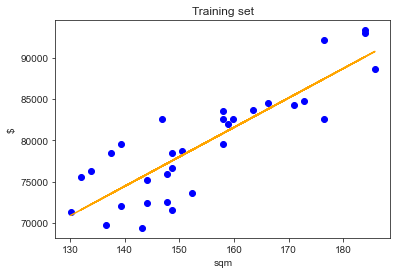

In [29]:
plt.scatter(x_train,y_train, color = 'blue')
plt.plot(x_train, lr.predict(x_train), color= 'orange')
plt.title('Training set')

plt.xlabel("sqm")
plt.ylabel('$')
plt.show()

# h) Comparing the scatter plot of the test set and a line graph of x_train and the predicted price from the training set

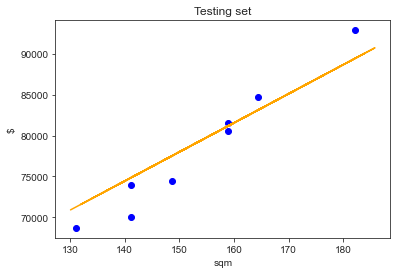

In [30]:
plt.scatter(x_test,y_test, color = 'blue')
plt.plot(x_train,lr.predict(x_train), color= 'orange')
plt.title('Testing set')

plt.xlabel("sqm")
plt.ylabel('$')
plt.show()

# i) Printing out the coefficient of determination.

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
y_test_predict = lr.predict(x_test)
print('The coefficient of determination: %.2f' % r2_score(y_test,y_test_predict))
#print('The mean squared error:', mean_squared_error(y_test,y_test_predict))

The coefficient of determination: 0.88


# j) What the coefficient of determination says about the accuracy of the model.
The coefficient of determination suggests that the model is useful and is accurate. The coefficient of determination of 0.88 or 88% shows that 88% of the data fit the regression model. And generally, a higher coefficient indicated a better fit for the model or maximum accuracy

# k) Printing out the slope of the linear regression model

In [32]:
print(lr.coef_)

[355.71558456]


# l) Interpretting the value of the slope that has been printed out.
The slope coefficient measures the estimated change in the average value of y as a result of a one-unit change in x. So slope coefficient = 355.71 shows that the average value of a house increases by $355.71, on average, for each additional one square metres of size.

# m) Printing out the intercept of the linear regression model.

In [33]:
print(lr.intercept_)

24642.39806524788


# n) Interpretting the meaning of the intercept that has been printed out.
The intercept is the estimated average value of y when the value of x is zero. And as no houses had an area of zero square metres, so the intercept = 24 642.40 indicates that for houses within the range of sizes observed, $24 642.40 is the portion of the house price not explained by square metres

# o) Understanding of the term overfitting.
When a model depicts the training dataset too accurately, this is known as overfitting. This indicates that the model is too close to the original. Therefore the model will not be able to perform well on new data if it has been overfitted. Overfitting is often a sign of a model that is overly complicated.

# p) A brief explanation of any three factors that lead to model overfitting and a suggestion of one that could have affected the model.
One factor is a model with too many parameters can result in overfitting. Meaning that the data is more sparse, which means one is more prone to reach an unjustified judgment.
Another factor may be, trying many different models that is, the training data will overfit the model if it is trained too much. The third factor is that data has noise that is there are outliers and errors in data which will go on to yield inaccurate results.

# q) Suggesting one way of addressing the overfitting challenge in the model above.
Training with more data: This makes it possible for algorithms to properly detect the signal to eliminate mistakes. It will not be able to overfit all the samples while the consumer feeds more training data into the model, and will be required to generalize to achieve better information. And ensuring that the model is split well to avoid bias.